In [1]:
pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [0]:
from google.colab import auth
auth.authenticate_user()

In [3]:
#colab에서 g란 이름으로 구글드라이브의 root를 MOUNT
from google.colab import drive
drive.mount('/content/g')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/g


In [0]:
!mkdir -p ~/.kaggle
!cp "/content/g/My Drive/kaggle/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c titanic

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 49.5MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 52.4MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.28MB/s]


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [0]:
from sklearn import model_selection
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [9]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [0]:
del df_train['PassengerId']
del df_train['Name']
del df_train['Ticket']
del df_train['Cabin']
del df_test['PassengerId']
del df_test['Name']
del df_test['Ticket']
del df_test['Cabin']

In [26]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null

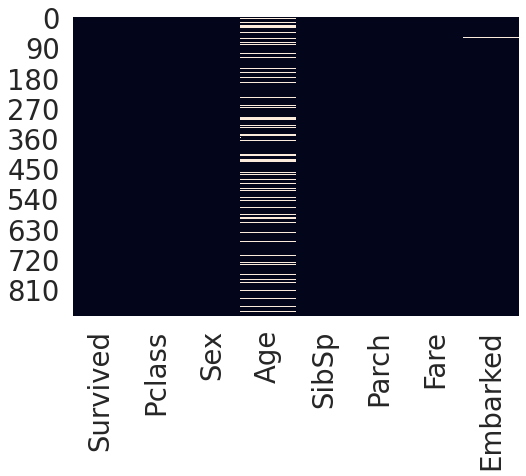

In [27]:
import seaborn as sns

sns.heatmap(df_train.isnull(), cbar=False)

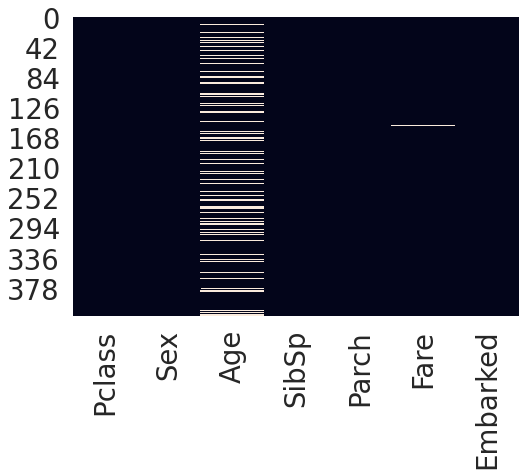

In [28]:
sns.heatmap(df_test.isnull(), cbar=False)

In [0]:
df_train.dropna(thresh=int(len(df_train)*0.5), axis=1)
df_train['Embarked']=df_train['Embarked'].fillna('S')
df_train['Age']=df_train['Age'].fillna(df_train['Age'].mean())

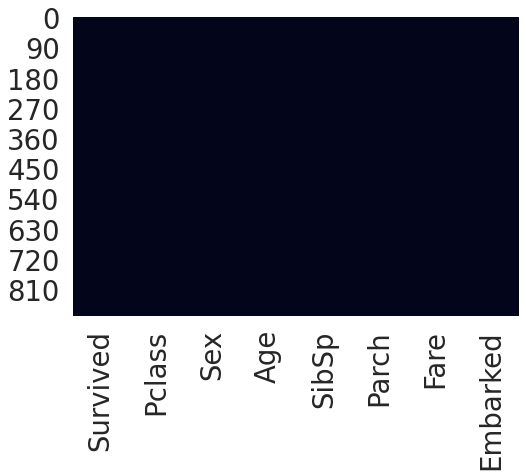

In [31]:
sns.heatmap(df_train.isnull(), cbar=False)

In [0]:
df_test.dropna(thresh=int(len(df_test)*0.5), axis=1)
df_test['Fare']=df_test['Fare'].fillna(df_test['Fare'].mean())
df_test['Age']=df_test['Age'].fillna(df_test['Age'].mean())

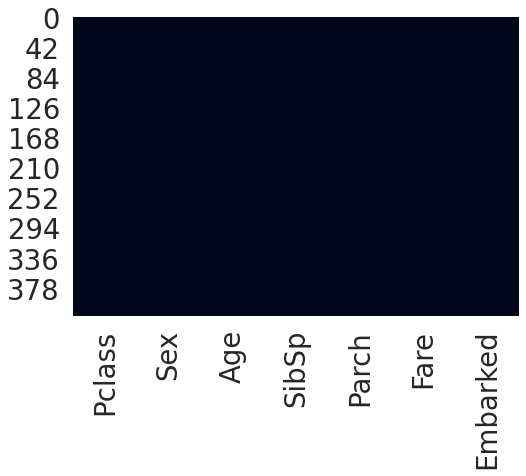

In [33]:
sns.heatmap(df_test.isnull(), cbar=False)

In [0]:
df_train['Sex']=df_train['Sex'].astype('category')
df_train['Pclass']=df_train['Pclass'].astype('category')
df_train['Embarked']=df_train['Embarked'].astype('category')
df_train = pd.get_dummies(df_train)

df_test['Sex']=df_test['Sex'].astype('category')
df_test['Pclass']=df_test['Pclass'].astype('category')
df_test['Embarked']=df_test['Embarked'].astype('category')
df_test = pd.get_dummies(df_test)

In [36]:
x_data = df_train.iloc[:,1:]
y_data = df_train.iloc[:,0]

x_data = x_data.values
y_data = y_data.values
print(x_data)
print(y_data)

[[22.          1.          0.         ...  0.          0.
   1.        ]
 [38.          1.          0.         ...  1.          0.
   0.        ]
 [26.          0.          0.         ...  0.          0.
   1.        ]
 ...
 [29.69911765  1.          2.         ...  0.          0.
   1.        ]
 [26.          0.          0.         ...  1.          0.
   0.        ]
 [32.          0.          0.         ...  0.          1.
   0.        ]]
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 

In [39]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3)

estimator = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
estimator.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [44]:
y_predict = estimator.predict(x_train)
score = metrics.accuracy_score(y_train, y_predict)
print('train score:', score)

train score: 0.797752808988764


In [45]:
y_predict = estimator.predict(x_test)
score = metrics.accuracy_score(y_test, y_predict)
print('test score:', score)

test score: 0.8171641791044776


In [46]:
print(x_test[:2])
y_predict = estimator.predict(x_test[:2])
print(y_predict)
for y1, y2 in zip(y_test, y_predict):
  print(y1, y2, y1 ==y2)

[[29.69911765  0.          0.          8.05        0.          0.
   1.          0.          1.          0.          0.          1.        ]
 [ 2.          3.          1.         21.075       0.          0.
   1.          0.          1.          0.          0.          1.        ]]
[0 0]
0 0 True
0 0 True
